# California housing dataset visualization using Python

<img src="https://mapsnworld.com/america/california-location-map.jpg" style="width:350px;height:280px" title="California in US map">

<div>
<h2 class="breadcrumb">Outline</h2><p>
</div>

- Introduction
- Data exploration and visualization
- Addressing tasks and questions
- Mapping
- Summary and conclusion

<div>
<h2 class="breadcrumb">Introduction</h2><p>
</div>
The California housing dataset was collected during the 1990 US census and is featured in a 1997 paper titled "Sparse Spatial Autoregressions" by Pace, R. Kelley, and Ronald Barry, published in the Statistics and Probability Letters journal. Derived from census data sourced from the StatLib repository by Luís Torgo, this dataset is constructed with one entry per census block group—the smallest geographic unit in U.S. Census data. While similar to the original dataset, it differs by having 207 randomly missing values in the total_bedrooms column. Additionally, an ocean_proximity attribute was introduced to categorize block groups based on their proximity to the ocean, the Bay area, inland, or being on an island.

#### Author's words:
"We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value)".

#### Reference
Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.

#### Reference for original data source:
http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html

<div>
<h2 class="breadcrumb">Data exploration and visualization</h2><p>
</div>

In [ ]:
## Importing all necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install folium

In [ ]:
!pip install missingno

In [3]:
# loading the dataset
housing_df = pd.read_excel("California housing dataset.xlsx")
housing_df.head(5)    # First 5 rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
# Fetching the column names of the dataset
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing_df.info()
## This function gives basic information about the dataset like number of rows and columns, number of non-null values present in
## each column, dtypes of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<div class="alert alert-success">
<h3> Brief information about each column in the dataset: </h3>
<h4> 20640 rows;10 columns </h4>

|No.|Column title|Description|variable|
|---|------------|-----------|--------|
|1.|longitude|A measure of how far west a house is; a more negative value is farther west; Longitude values range from -180 to +180|continous|
|2.|latitude|A measure of how far north a house is; a more higher value is farther north; Longitude values range from -90 to +90|continous|
|3.|housing_median_age|Median age of a house within a block; a lower number is a newer building|discrete|
|4.|total_rooms|Total number of rooms within a block|discrete|
|5.|total_bedrooms|Total number of bedrooms within a block|discrete|
|6.|population|Total number of people residing within a block|discrete|
|7.|households|Total number of households, a group of people residing within a home unit, for a block|discrete|
|8.|median_income|Median income for households within a block of houses (measured in tens of thousands of US Dollars)|continuous|
|9.|median_house_value|Median house value for households within a block (measured in US Dollars)|continous|
|10.|ocean_proximity|categorical column describing their proximity to the ocean, the Bay area, inland, or being on an island|categorical|

<div class="alert alert-success">
<h4> Keynote: <h/4>
    
- The 'ocean_proximity' column is categorical, while all other columns are numerical.
- The 'ocean_proximity' column is derived from latitude and longitude data, making it a derived column.
- The dependent variable is median house value in USD

In [ ]:
housing_df.describe(include='all')
#getting basic statistical view about each column including mean, minimum value, maximum value etc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
#checking if there is any duplicate rows
housing_df[housing_df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


<div class="alert alert-success">
<h4> No duplicate rows are present in the dataset </h4>

In [ ]:
housing_df.isnull().sum()
# checking number of missing values in each columns

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Distribution of data

<function matplotlib.pyplot.show(close=None, block=None)>

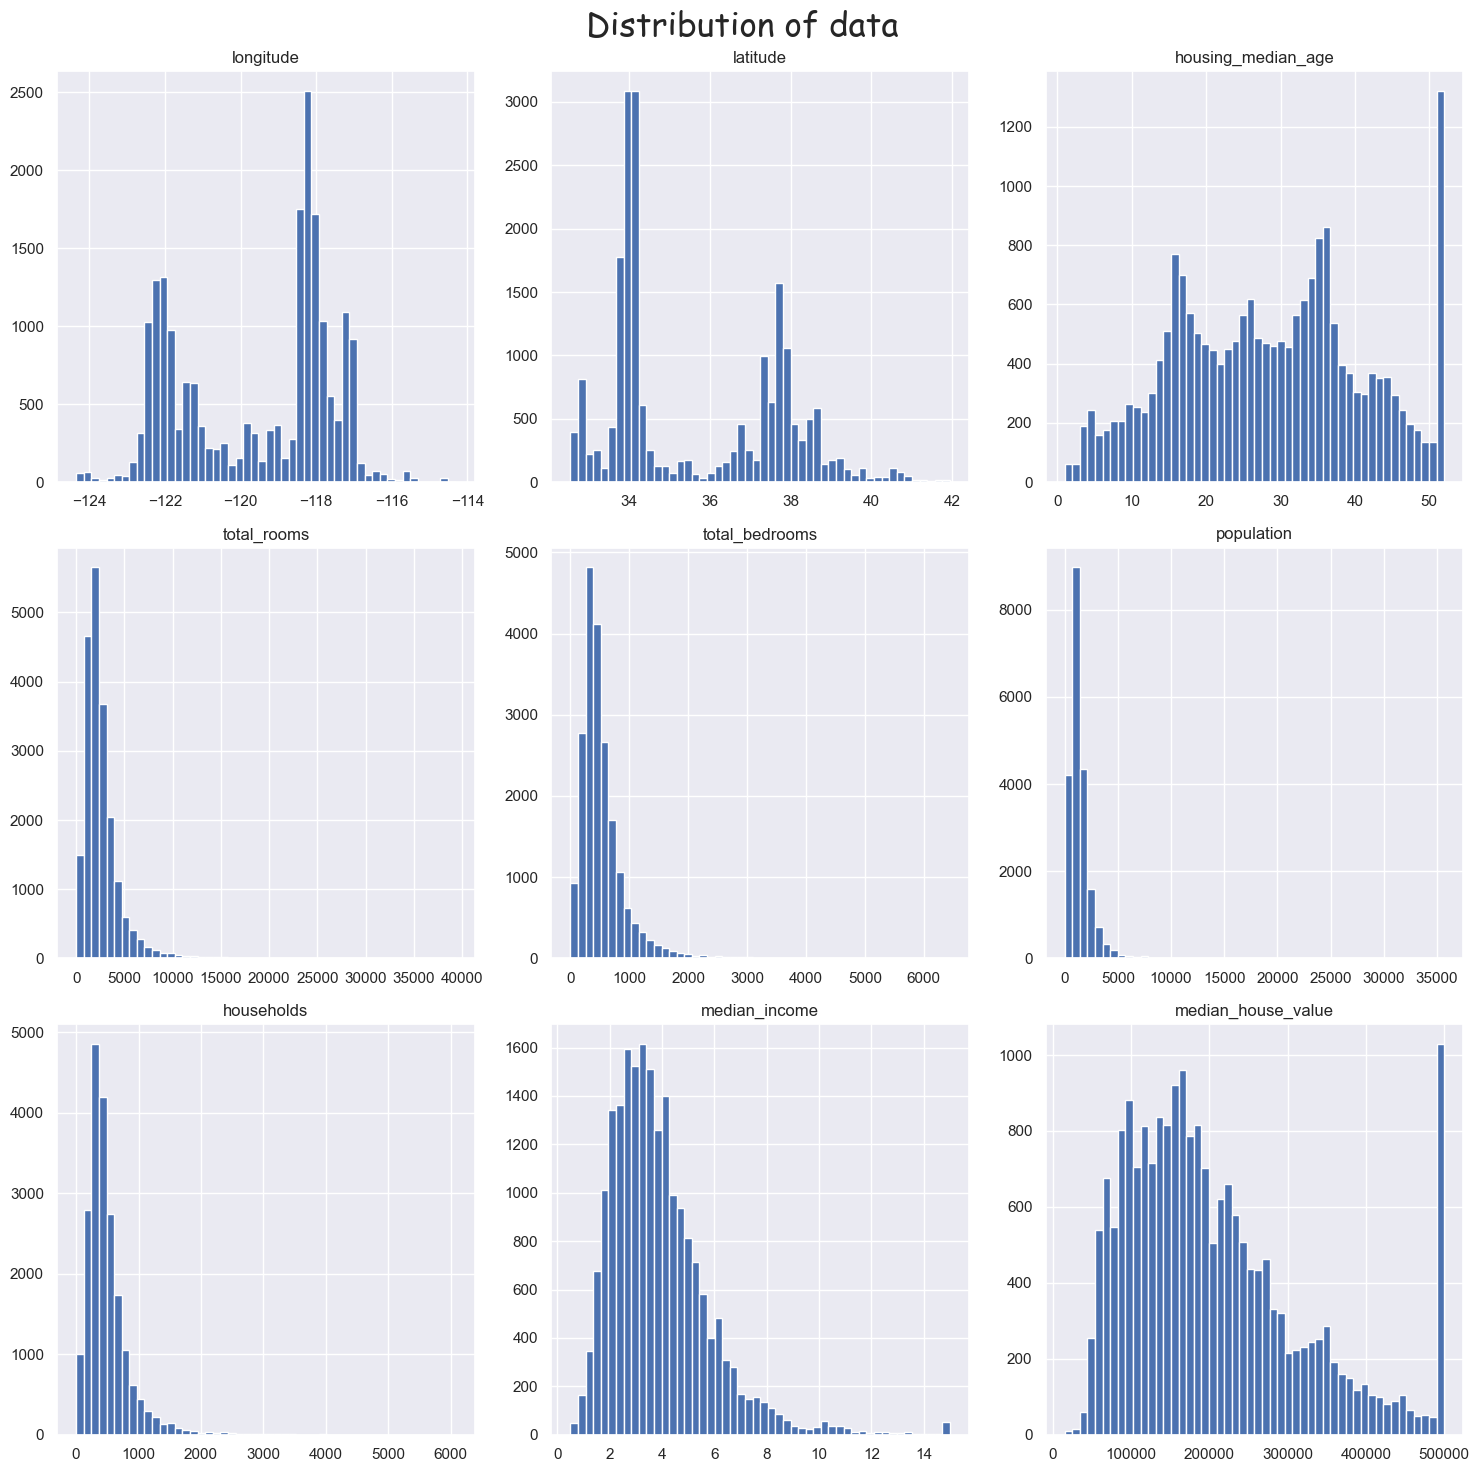

In [ ]:
# Overview of distribution of data
housing_df.hist(bins = 50, figsize = (15,15))
plt.suptitle("Distribution of data", fontsize = 24,fontname ='Comic Sans MS')
plt.tight_layout()
plt.show

<div class="alert alert-success">

#### Keynote:
- Attributes such as median income, house value, population, number of rooms, and population are right-skewed.

- The age of the houses shows a multimodal distribution, with some houses capped at 52 years. House age ranges from 1 to 52.

- Maximum age of the house is 52, but it is median age of each block, so there will be houses aging more than 52 in housing block

- In median house values, a notable number of houses have the same value of USD 500,001, which may be due to imputation. Houses with values greater than 500,000 dollars may have been replaced with 500,001 dollars.

### Correlation of data between columns

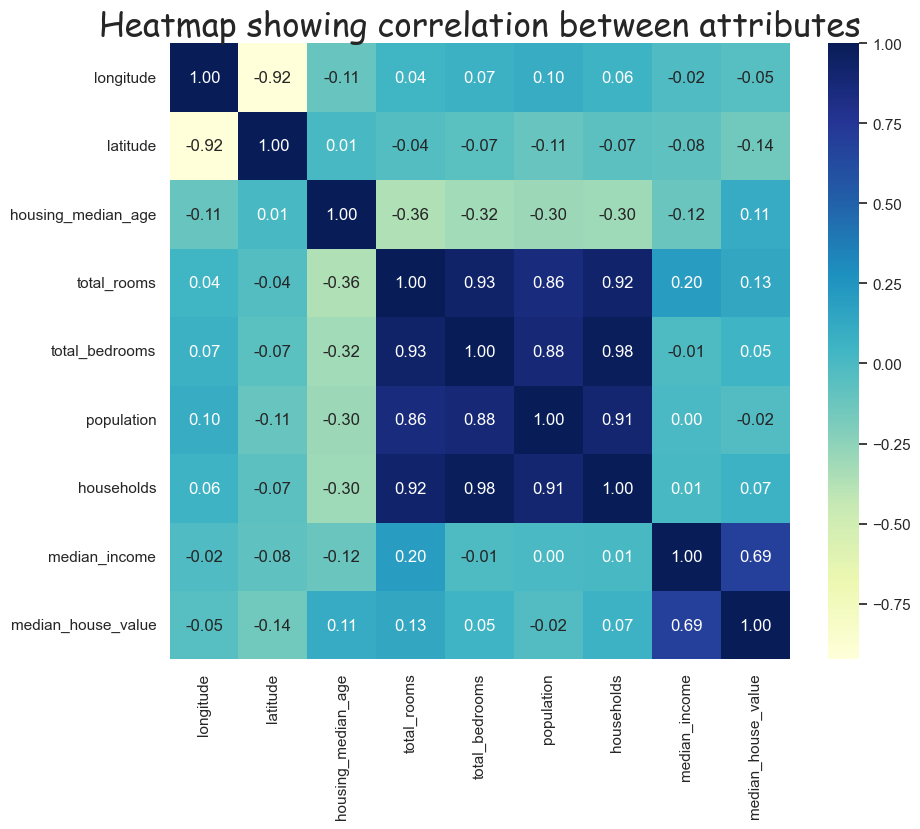

In [ ]:
# creating heatmap to find the correlation between attributes
df = housing_df.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(10, 8))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title("Heatmap showing correlation between attributes", fontsize=24, fontname='Comic Sans MS')
plt.show()

<div class="alert alert-success">

#### Keynote:
- A weak negative correlation is observed between house age and total rooms, total bedrooms, population, and households.

    - This suggests that older houses tend to have fewer rooms and are sparsely populated.

    - Conversely, newly built houses are comparatively densely populated and have more rooms, a trend likely influenced by urbanization and industrialization.

- A strong positive correlation is found between the number of rooms and population, which is normal and expected.

- There is a positive correlation between house value and median income. High-income individuals tend to reside in higher-priced houses, which is a natural association.

- Weak positive correlation is observed between the age of the house and its price.

### Distribution of missing values

<Axes: >

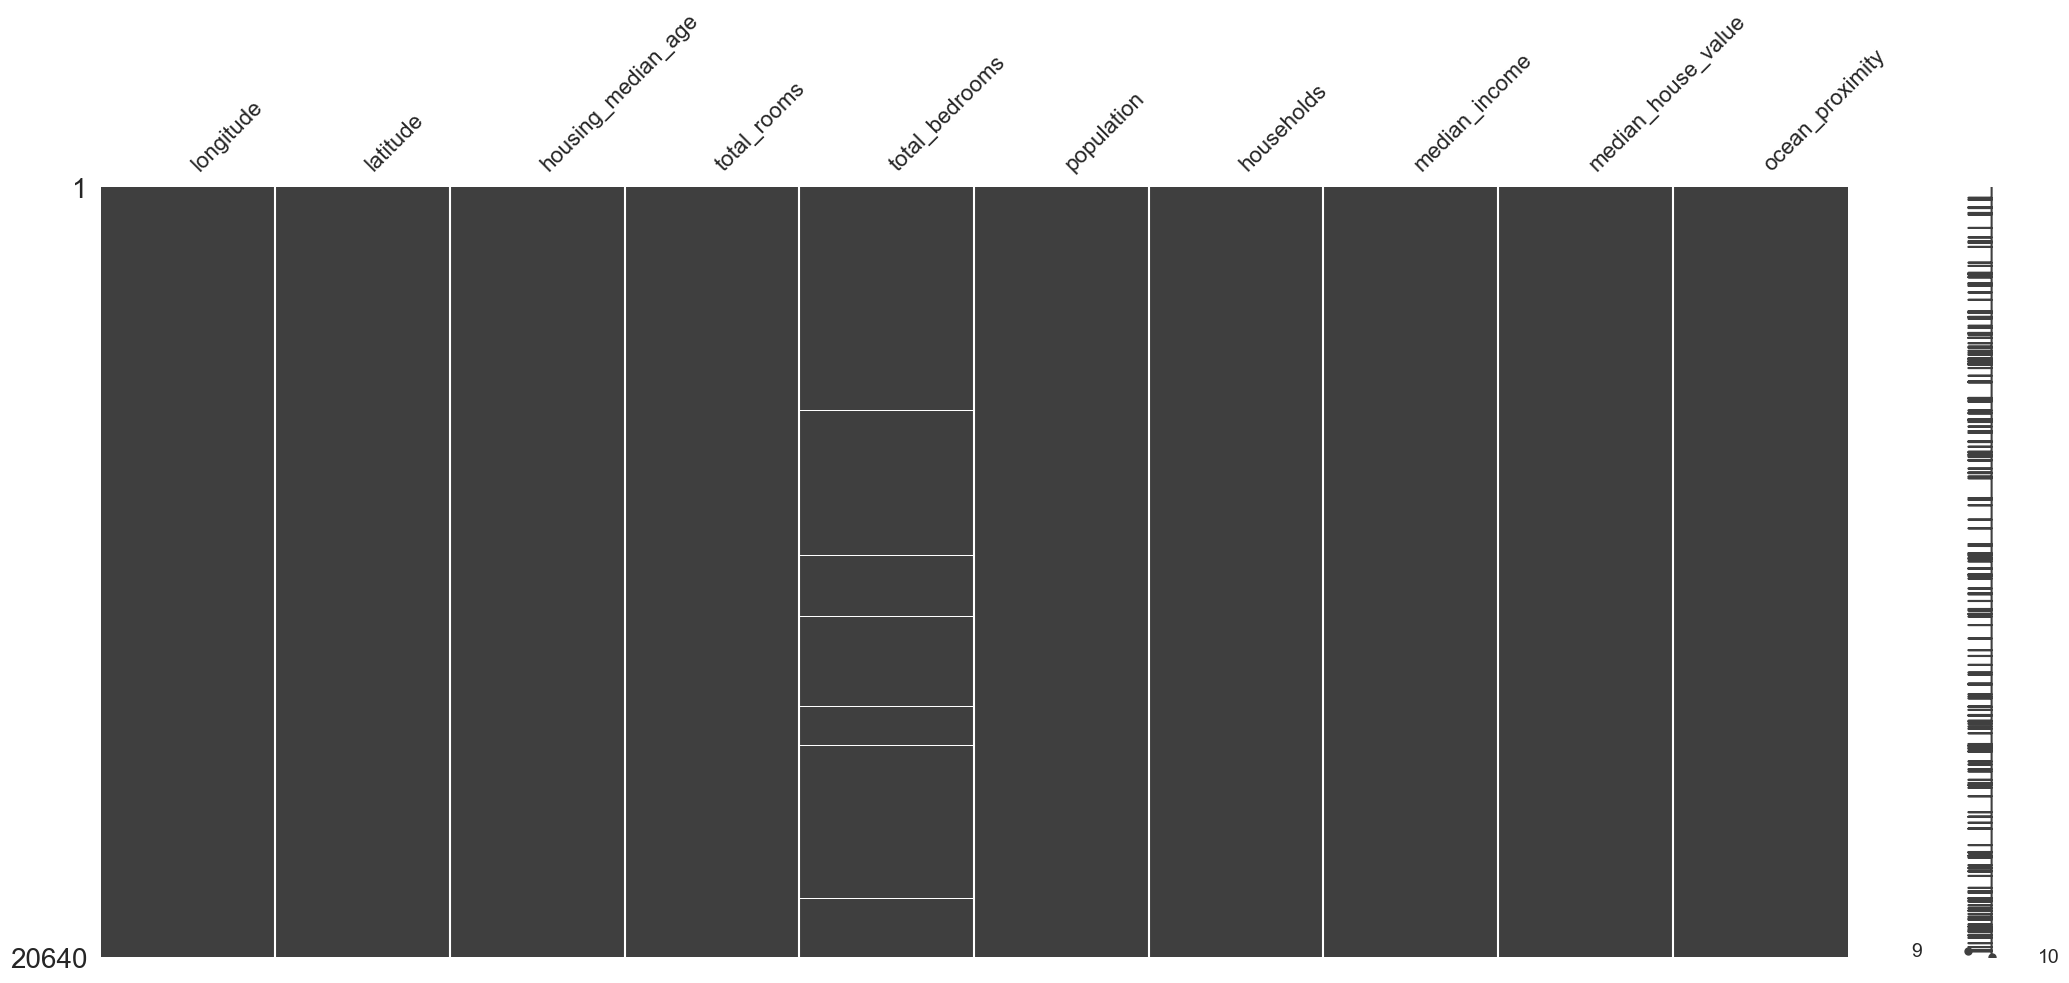

In [ ]:
import missingno as msno # library to examine missing values
msno.matrix(housing_df)

<div class="alert alert-success">

This matrix shows how missing values spread over the dataset

### Exploring the age of the house

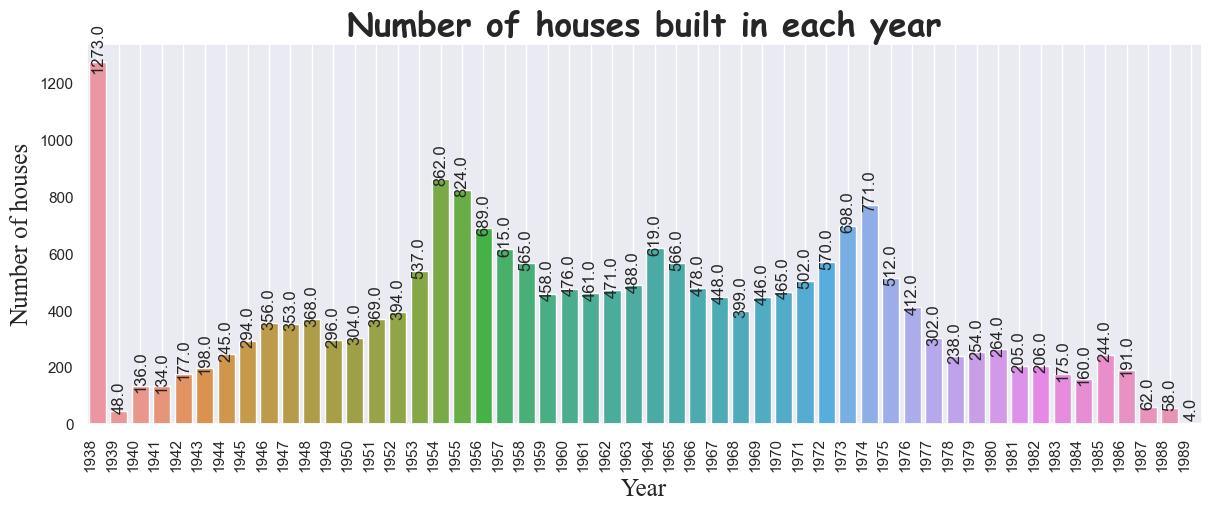

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

# Create countplot
sns.countplot(data=housing_df, x=(1990 - housing_df['housing_median_age']), ax=ax)
ax.set_xlabel("Year",fontname='Times New Roman', fontsize=18)
ax.set_ylabel("Number of houses",fontname='Times New Roman', fontsize=18)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Annotate count values at a 90-degree angle
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=90, xytext=(0, 10), textcoords='offset points')

ax.grid()
ax.set_title('Number of houses built in each year',fontname='Comic Sans MS', fontsize=24, weight='bold')

# Show the plot
plt.show()

<div class="alert alert-success">

### Keynote:
- Although we observe prominent peaks in 1954-1955 and 1974-1975, there are smaller peaks in 1946, 1965, and 1985, indicating a wave-like pattern in real estate development for each decade.

- Various causes may contribute, including stock market fluctuations, socio-economic factors.

- There are 1273 houses built in 1938, but the very next year, only 48 houses are built, which is unusual. This may be attributed to the start of World War II in 1939.

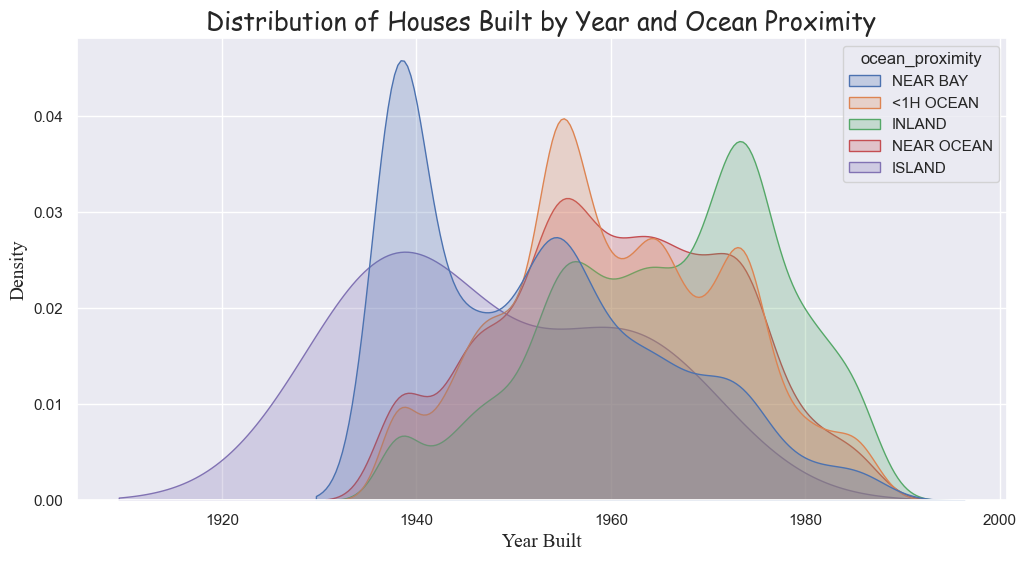

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# KDE plot grouped by ocean proximity
sns.kdeplot(data=housing_df, x=(1990 - housing_df['housing_median_age']), hue='ocean_proximity', fill=True, common_norm=False, ax=ax)

# Set labels and title
ax.set_xlabel('Year Built', fontname='Times New Roman', fontsize=14)
ax.set_ylabel('Density', fontname='Times New Roman', fontsize=14)
ax.set_title('Distribution of Houses Built by Year and Ocean Proximity', fontname='Comic Sans MS', fontsize=18)

# Show the plot
plt.show()


<div class="alert alert-success">

### Keynote:
- This kdeplot indicates that a higher number of houses were built in the near bay area and on the island during 1938 to 1940.

- In inland areas, there was a surge in the number of houses built during the 1970s.

- Near the ocean, more houses were constructed during the mid-20th century.

### Relationship between location of house and other attributes

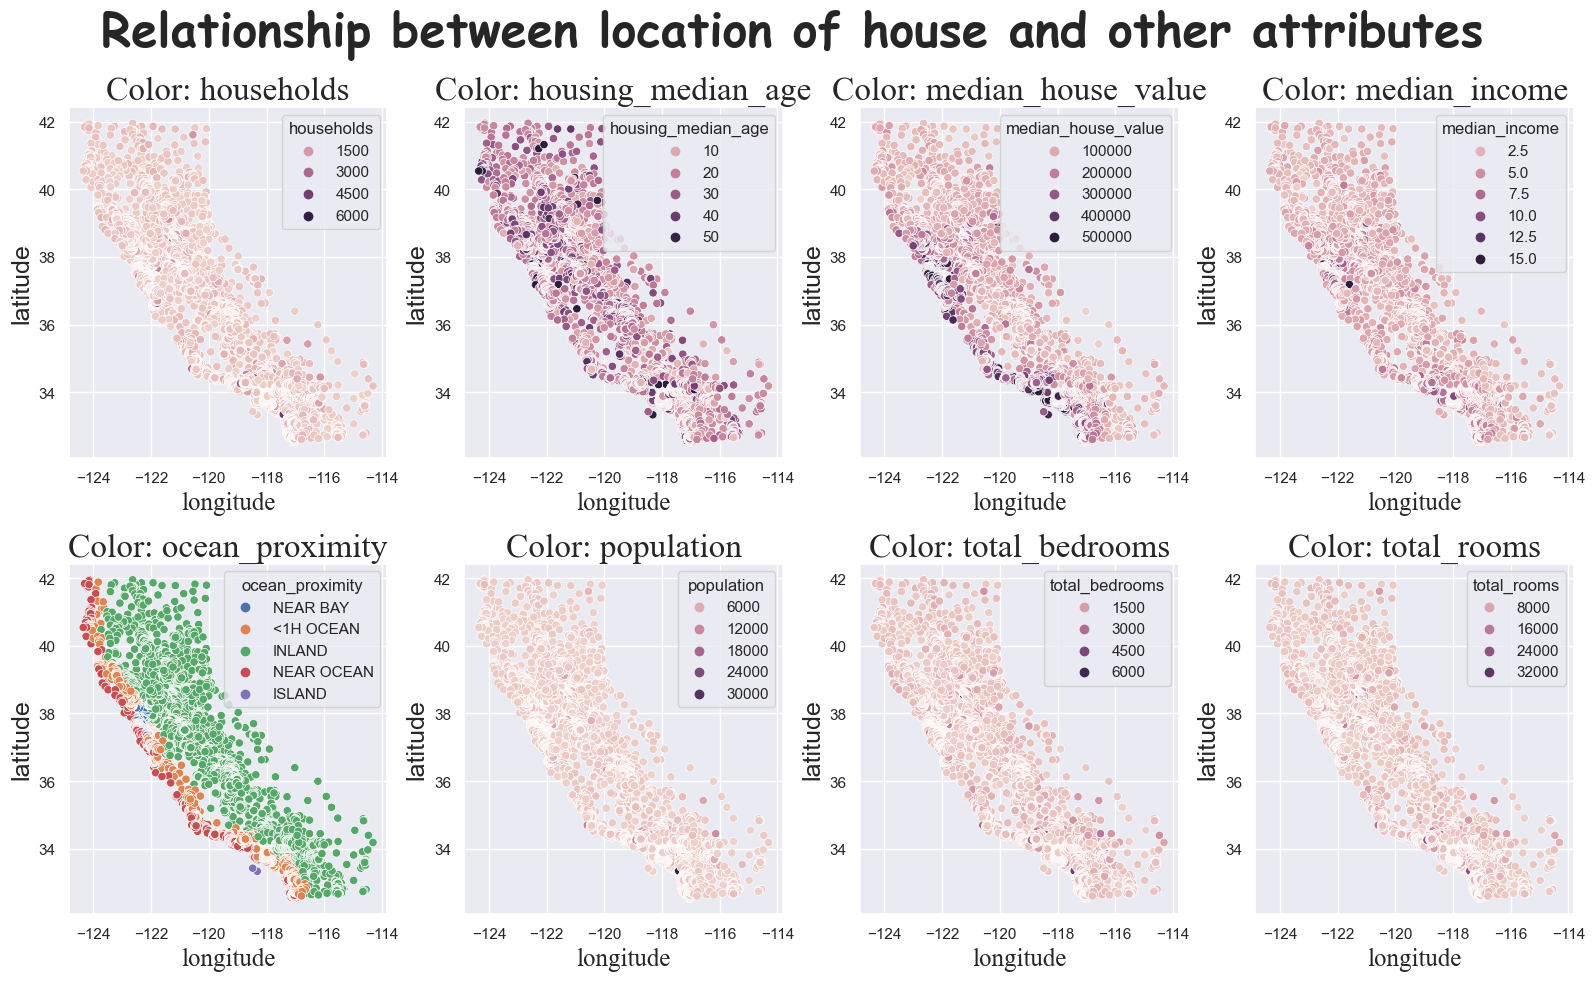

In [ ]:
x_column = 'longitude'
y_column = 'latitude'

# Get a list of columns to use as colors
color_columns = housing_df.columns.difference(['longitude', 'latitude'])

# Determine the number of subplots
num_subplots = len(color_columns)

# Create a 2D grid of subplots
num_rows = int(np.sqrt(num_subplots))
num_cols = int(np.ceil(num_subplots / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# Flatten the axes array if needed
if num_subplots == 1:
    axes = [axes]

for i, color_column in enumerate(color_columns):
    row, col = divmod(i, num_cols)
    ax = axes[row][col]
    sns.scatterplot(x=housing_df['longitude'], y=housing_df['latitude'], hue=housing_df[color_column], ax=ax)
    ax.set_xlabel('longitude',fontsize=18,fontname='Times New Roman')
    ax.set_ylabel('latitude',fontsize=18)
    ax.set_title(f'Color: {color_column}', fontsize=24,fontname='Times New Roman')

# Remove empty subplots if there are any
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle("Relationship between location of house and other attributes",fontname='Comic Sans MS', fontsize=34, weight='bold')
plt.tight_layout()
plt.show()

<div class="alert alert-success">

### Keynote:
- House value strongly correlates with location; houses near the ocean are more valuable than those inland.

- Income is related to ocean proximity of the house, with higher incomes observed in near-ocean areas

- Other parameters do not exhibit a correlation with location.

<div>
<h2 class="breadcrumb">Addressing the questions</h2><p>
</div>

### 1)What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [ ]:
# Median income for households within a block of houses (measured in tens of thousands of US Dollars)
Average = (housing_df['median_income'].mean())*10000   #converting into dollars by multiplying with 10000
Average_median_income = "${:,.2f}".format(Average)
print(f"The average median income of california housing dataset is {Average_median_income}")

The average median income of california housing dataset is $38,706.71


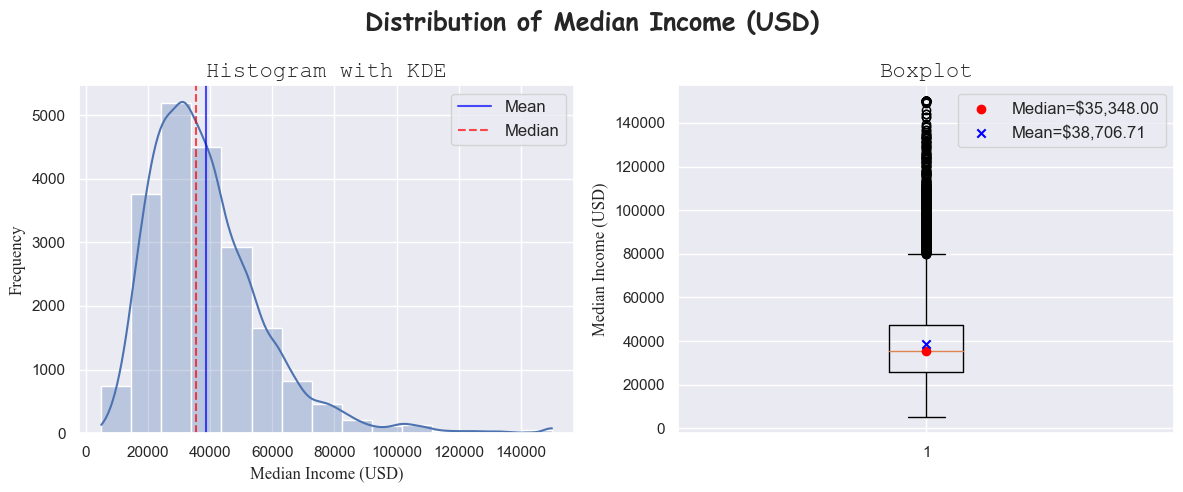

In [ ]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot - Histogram
sns.histplot(housing_df['median_income']*10000, kde=True, fill='#f0ffff', bins=15, ax=axes[0], alpha=0.3)
axes[0].axvline(x=(housing_df['median_income'] * 10000).mean(), color='blue', alpha=0.7, label='Mean')
axes[0].axvline(x=(housing_df['median_income'] * 10000).median(), c='red', ls='--', alpha=0.7, label='Median')
axes[0].legend(fontsize='12', title_fontsize='14', labelspacing=0.5)
axes[0].set_xlabel('Median Income (USD)',fontname='Times New Roman', fontsize=12)
axes[0].set_ylabel('Frequency',fontname='Times New Roman', fontsize=12)
axes[0].set_title('Histogram with KDE',fontname='Courier New', fontsize=16)

# Second subplot - Boxplot
axes[1].boxplot(housing_df['median_income'] * 10000)
median = [np.median(housing_df['median_income'] * 10000)]
axes[1].scatter([1], median, marker='o', color='red', label=f'Median={"${:,.2f}".format(median[0])}', zorder=3)
mean = [np.mean(housing_df['median_income'] * 10000)]
axes[1].scatter([1], mean, marker='x', color='blue', label=f'Mean={"${:,.2f}".format(mean[0])}', zorder=3)
axes[1].set_title('Boxplot',fontname='Courier New', fontsize=16)
axes[1].set_ylabel('Median Income (USD)',fontname='Times New Roman', fontsize=12)
axes[1].legend(fontsize='12', title_fontsize='14', labelspacing=0.5)

# Show the subplots
plt.suptitle("Distribution of Median Income (USD)",fontname='Comic Sans MS', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()


<div class="alert alert-success">

### Explanation

- The histogram reveals skewness in the data.

- Median_income data is right-skewed, indicating that the majority of the data is clustered towards lower values, with a tail on the right side of the graph. This is also known as positively skewed data.

- The boxplot shows that the mean is slightly greater than the median, confirming the skewness. Outliers are observed only on the upper side, pulling the mean slightly towards the upper side.

- Although there are outliers on the upper side, their count is low, so they have a limited impact on the mean value.

### 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

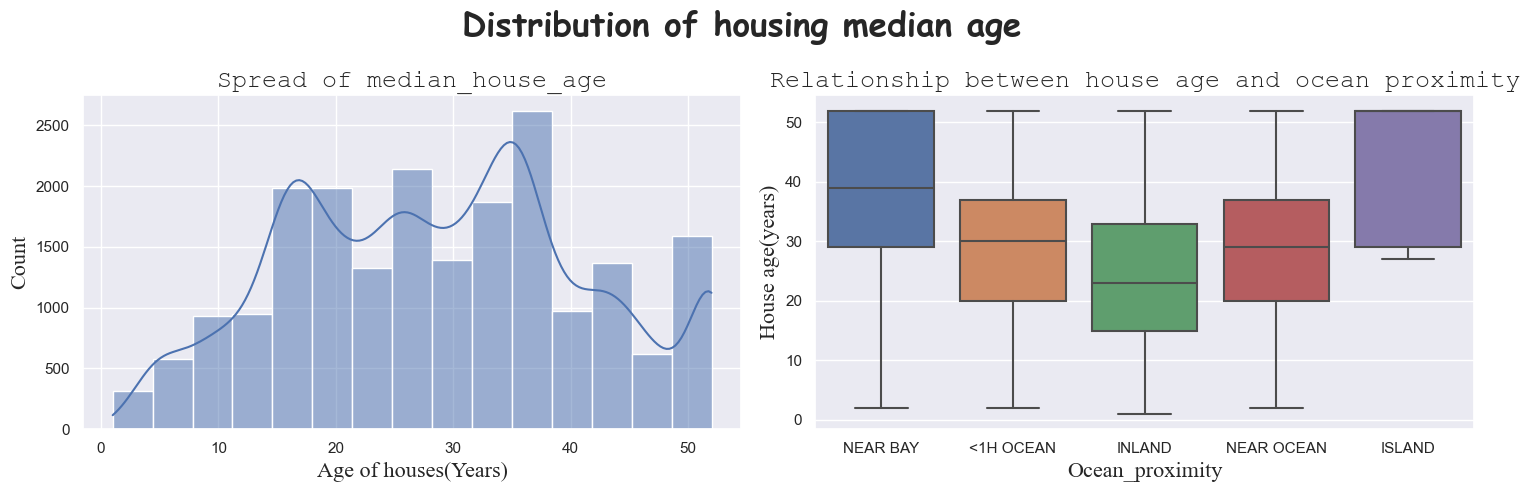

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(housing_df['housing_median_age'],bins=15,kde=True, ax=axes[0])
axes[0].set_title('Spread of median_house_age',fontname='Courier New', fontsize=18)
axes[0].set_ylabel('Count',fontname='Times New Roman', fontsize=16)
axes[0].set_xlabel('Age of houses(Years)',fontname='Times New Roman', fontsize=16)


sns.boxplot(x="ocean_proximity", y="housing_median_age", data=housing_df, ax=axes[1])
axes[1].set_title('Relationship between house age and ocean proximity',fontname='Courier New', fontsize=18)
axes[1].set_ylabel('House age(years)',fontname='Times New Roman', fontsize=16)
axes[1].set_xlabel('Ocean_proximity',fontname='Times New Roman',fontsize=16)

plt.suptitle("Distribution of housing median age",fontname='Comic Sans MS', fontsize=24, weight='bold')
plt.tight_layout()
plt.show()

<div class="alert alert-success">

### Explanation:
- The distribution appears to be multimodal, resembling two primary modes, but smaller modes are also noticeable in between.
- The housing age of 52 shows a count of more than 1200, which appears unusual.
- This anomaly may be attributed to real estate bubble and bust during an economic recession.
- When comparing with ocean_proximity and housing median age, it is evident that houses inland have a lower age compared to those in locations nearer to the ocean.

### 3. Show with the help of visualization, how median_income and median_house_values are related?

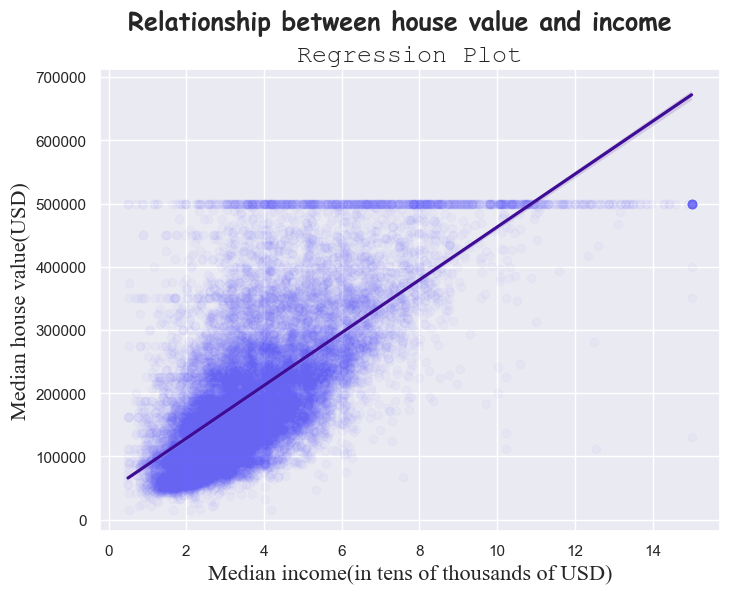

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# drawing regression plot
sns.regplot(
    x=('median_income') ,
    y=('median_house_value'),
    data = housing_df,
    line_kws={'color': '#3e0c95'},  # Set color for the regression line
    scatter_kws={'color': '#6764fb', 'alpha': 0.03},  # Set color and opacity for the markers
)
ax.set_xlabel('Median income(in tens of thousands of USD)',fontname='Times New Roman', fontsize=16)
ax.set_ylabel('Median house value(USD)',fontname='Times New Roman', fontsize=16)
ax.set_title('Regression Plot',fontname='Courier New', fontsize=18)



# Adjust layout
plt.suptitle("Relationship between house value and income",fontname='Comic Sans MS', fontsize=18, weight='bold')
plt.show()

<div class="alert alert-success">

#### Explanation

- A positive correlation denotes a relationship between two variables that tend to move in the same direction. It exists when one variable decreases as the other decreases or increases as the other increases.

- The positive slope in the regression line indicates an increase in house value with an increase in income.


### 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [ ]:
# Attempting to see number of missing values in each column
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_new = housing_df.dropna()                # dropping rows with missing values
housing_new.isnull().sum()                       # Confirming that there is no missing values in new dataset

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<div class="alert alert-success">

#### Explanation:
There are 207 missing values in total bed rooms columns.
Those rows are removed and assigned to the new object

### 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [9]:
# Calculate the mean of 'total_bedrooms'
bedrooms_mean = housing_df['total_bedrooms'].mean()

# Print the original mean
print("Original Mean:", bedrooms_mean)

# Room number cannot be in decimal, So, round the mean to the nearest integer
bedrooms_mean_rounded = round(bedrooms_mean)

# Print the rounded mean
print("Rounded Mean:", bedrooms_mean_rounded)

# Fill missing values with the rounded mean
housing_df['total_bedrooms'] = housing_df['total_bedrooms'].fillna(bedrooms_mean_rounded)


Original Mean: 537.8705525375618
Rounded Mean: 538


<div class="alert alert-success">

#### Explanation:
- In order to address missing values within the dataset, a common approach is to impute them with the mean of the respective column.
- This method involves calculating the mean value for each numerical feature and replacing the missing entries with these computed means.
- By adopting this strategy, we aim to maintain the overall statistical characteristics of the dataset, ensuring a representative substitution for the missing values.

### 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [ ]:
def My_Median(data):                                              # Function is inclusive for list, pd.series, np.arrays and pd.dataframes
    if isinstance(data, pd.DataFrame):                            # first checking if given data is dataframe
        for i in data.columns:                                    # for loop for each column names
            if data[i].dtype != object:                           # checking if data type of column is not object
                column_data = data[i]
                sorted_data = column_data.dropna().sort_values()  # removing missing values and sorting values in ascending order
                a = int(len(sorted_data))
                if a % 2 != 0:                                         # median for data with odd number of values
                    median = round(sorted_data.iloc[int((a-1)/2)], 2)
                else:
                    y = sorted_data.iloc[int(a/2)]                     # median for data with odd number of values
                    z = sorted_data.iloc[int((a-2)/2)]
                    median = round((y + z) / 2, 2)
                print(f"Median of {i} is {median}")
            else:
                print(f"{i} is object datatype")

    else:
        my_list = list(data)                                    # if data is not dataframe, created list, deleted missing values and sorted data
        x = [k for k in my_list if pd.notna(k)]
        x.sort()
        a = int(len(x))
        if a%2 != 0:
          median = round(x[int((a-1)/2)],2)
        else:
          y = x[int(a/2)]
          z = x[int((a-2)/2)]
          median = round((y+z)/2,2)
        print(f"Median of given data is {median}")


# Example usage:
x = [6, 1, 2, 5, 6, 11]
y = np.array([4, 7, 1, 9, 11, 24])
z = pd.Series([99, 44, 3, 22, 11])

print(My_Median(x))
print(My_Median(y))
print(My_Median(z))
print(My_Median(housing_df))

Median of given data is 5.5
None
Median of given data is 8.0
None
Median of given data is 22
None
Median of longitude is -118.49
Median of latitude is 34.26
Median of housing_median_age is 29.0
Median of total_rooms is 2127.0
Median of total_bedrooms is 438.0
Median of population is 1166.0
Median of households is 409.0
Median of median_income is 3.53
Median of median_house_value is 179700.0
ocean_proximity is object datatype
None


### 7. Plot latitude versus longitude and explain your observations.

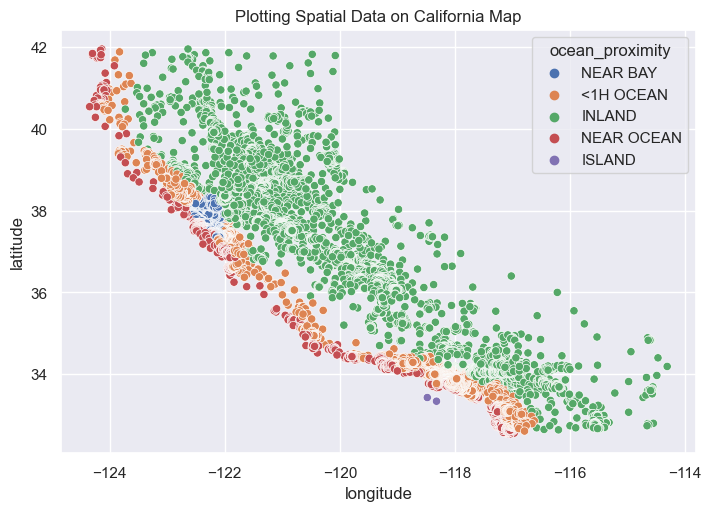

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
sns.scatterplot(x=housing_df.longitude, y=housing_df.latitude, hue = housing_df.ocean_proximity, ax=ax)
ax.set_title('Plotting Spatial Data on California Map')
plt.show()

<div class="alert alert-success">

### Explanation:
- Plotting latitude along the Y-axis and longitude along the X-axis, similar to a geographical map, reveals the layout of houses in the California state of the USA.
- In this map, we can distinctly observe the distribution of houses across California.
- As we move towards the ocean, the housing density increases.

### 8.Create a data set for which the ocean_proximity is ‘Near ocean’

In [ ]:
print(housing_df['ocean_proximity'].value_counts())
housing_near_ocean = housing_df[housing_df['ocean_proximity']=='NEAR OCEAN']
housing_near_ocean.info()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 1850 to 20425
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2658 non-null   float64
 1   latitude            2658 non-null   float64
 2   housing_median_age  2658 non-null   int64  
 3   total_rooms         2658 non-null   int64  
 4   total_bedrooms      2658 non-null   float64
 5   population          2658 non-null   int64  
 6   households          2658 non-null   int64  
 7   median_income       2658 non-null   float64
 8   median_house_value  2658 non-null   int64  
 9   ocean_proximity     2658 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 228.4+ KB


### 9. Find the mean and median of the median income for the data set created in question 8.

In [ ]:
# Median income for households within a block of houses (measured in tens of thousands of US Dollars)
Average = (housing_near_ocean['median_income'].mean())*10000   #converting into dollars by multiplying with 10000
Average_median_income = "${:,.2f}".format(Average)
print(f"The average median income of houses located near ocean is {Average_median_income}")
Median = (housing_near_ocean['median_income'].median())*10000   #converting into dollars by multiplying with 10000
Median_median_income = "${:,.2f}".format(Median)
print(f"The median of median income of houses located near ocean is {Median_median_income}")

The average median income of houses located near ocean is $40,057.85
The median of median income of houses located near ocean is $36,470.50


<div class="alert alert-success">

Explanation:
- Mean and Median income of the houses in overall dataset are 38706 and 35348 US dollars respectively.
- On comparison to that,  Mean and median values of near ocean dataset is pretty lower.

### 10.Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [8]:
def categorize_bedroom_size(x):
    if x >1000:
        return 'large'
    elif x<1000 and x>10:
        return 'medium'
    elif x<10 and x>0:
        return 'small'
    else:
        return 'missing'

housing_df['total_bedroom_size'] = housing_df['total_bedrooms'].apply(categorize_bedroom_size)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium


<div>
<h2 class="breadcrumb">Mapping</h2><p>
</div>

<div class="alert alert-success">

- Folium and Plotly are powerful Python libraries that offer dynamic ways to visualize spatial data
- Plotly is renowned for its versatility in creating interactive plots.
- Plotly's density maps are excellent tools for visualizing the distribution of data across a geographical region
- Both Folium and Plotly make it easier to understand and explore data that has a location component, making it more fun and interactive\
- Here we can easily zoom in and out to see the distribution of data over various locations

In [ ]:
# Drawing heatmap using folium library
import folium
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[36.7783, -119.4179], zoom_start=6, min_zoom=5)

df = housing_df[['latitude', 'longitude']]
data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

HeatMap(data, radius=10).add_to(map_hooray)

map_hooray

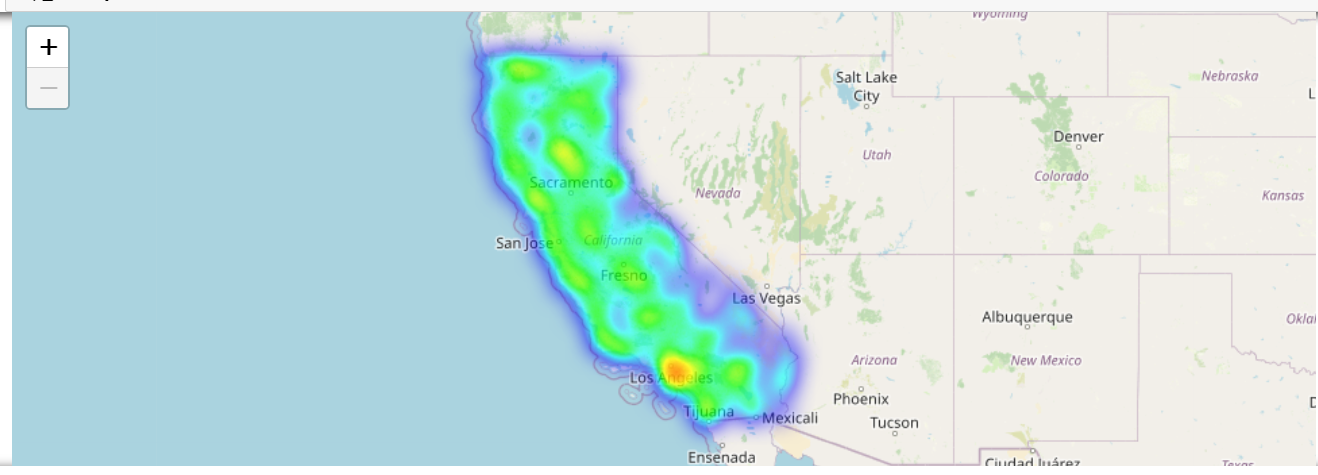

In [ ]:
# Drawing density using plotly library (interactive library)
fig = px.density_mapbox(housing_df,
                        lat='latitude',
                        lon='longitude',
                        z='median_house_value',
                        radius=10,
                        center=dict(lat=36.7783, lon=-119.4179),  # Center coordinates
                        zoom=5,  # Initial zoom level
                        mapbox_style="open-street-map",  # Choose Mapbox style
                        opacity=0.7,
                        title='Density Map of Median House Value')

# Show the figure
fig.show()

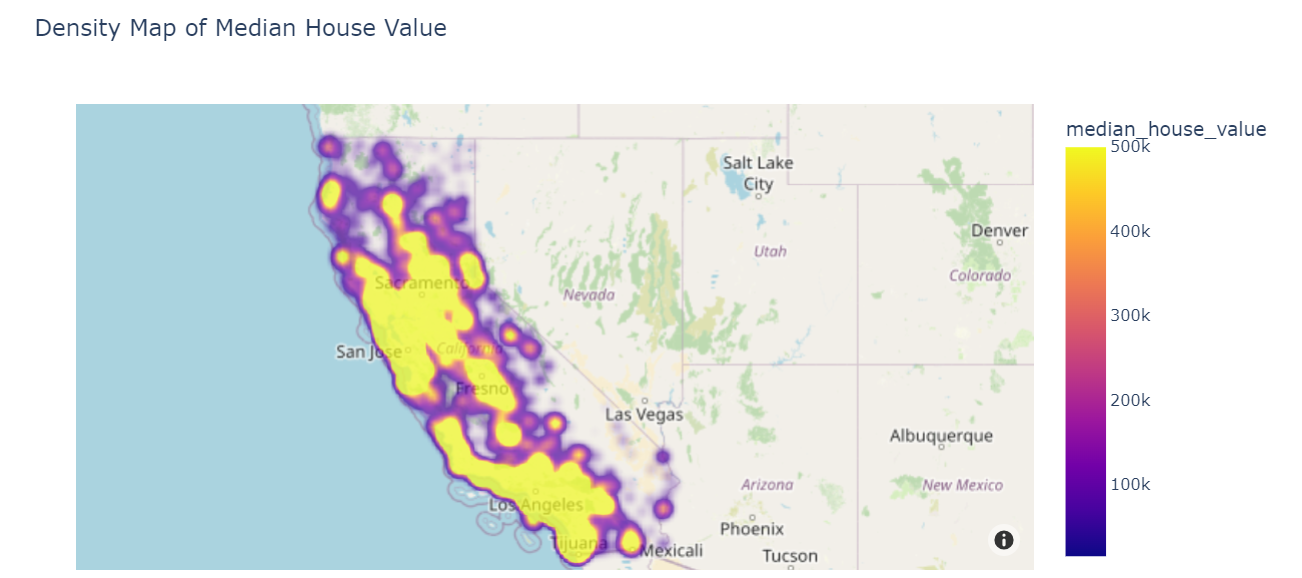

<div>
<h2 class="breadcrumb">Summary and Conclusion</h2><p>
</div>

    In analyzing the California housing dataset, we observed various trends and patterns.
The data exhibits right-skewed distributions, with median_income positively correlated with house values. Notably, there's a multimodal distribution in house construction years, suggesting waves of real estate development over each decade. The geographical distribution, visualized through Folium and Plotly maps, highlights denser housing near the ocean. Missing values, particularly in 'total_bedrooms,' were addressed through mean imputation. Interestingly, house values showed a strong correlation with location, especially near the ocean, while income demonstrated a weaker correlation. Overall, these insights enhance our understanding of California's housing landscape, providing valuable context for further analysis.